/home/rtom/miniconda3/envs/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(0.0, 206062.5)

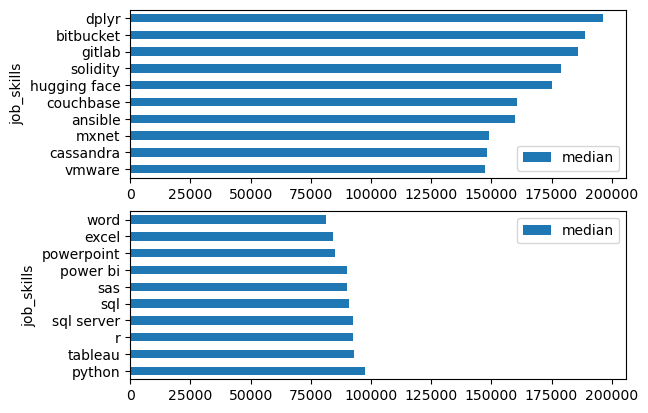

In [2]:
import ast 
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


def box_plot(x):
    if pd.notna(x):
        return ast.literal_eval(x)
    else:
        return x
df['job_skills'] = df['job_skills'].apply(box_plot)
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_DA_US = df_DA.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]

df_DA_US_GRP = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_US_pay = df_DA_US_GRP.sort_values(by='median',ascending=False).head(10)
df_DA_US_skill = df_DA_US_GRP.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_DA_US_skill


fig,ax = plt.subplots(2,1)

df_DA_US_pay.plot(kind='barh',y='median',ax=ax[0])
df_DA_US_skill.plot(kind='barh',y='median',ax=ax[1])
ax[0].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())